In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
### in this regression, we use 1 and 0 to represent renew, and exclude cost
### because cost and qty is the same as sales 
### we also include the days_diff, which represents the days between the lastday of buying and 2018-01-31
all = pd.read_csv('all_member01.csv')

In [7]:
all

,Unnamed: 0,X,MEMBERSHIP_ID,MEMBERSHIP_TYPE_CODE,MILES_TO_CLUB,hhh_age_desc,marital_status_desc,income_lower,income_upper,hh_size_desc,...,cost,num,date_min,date_max,num_visit,num_category,num_sub_category,num_item,days_dif,freq
0,1,1,55081,2,NaN,NaN,NaN,NaN,NaN,NaN,...,2318.0127,299,2017-01-06,2017-03-17,24,35,71,170,320.0,2.916667
1,2,2,168584,2,2.80,76.0,NaN,50.0,74.0,2.0,...,877.6728,131,2017-01-19,2017-12-19,30,13,30,45,43.0,11.133333
2,3,3,211504,3,NaN,NaN,NaN,NaN,NaN,NaN,...,115.2700,15,2017-02-09,2017-09-01,2,9,11,13,152.0,102.000000
3,4,4,39986,2,1.15,54.0,0.0,150.0,NaN,1.0,...,410.8000,48,2017-01-25,2017-12-23,11,9,12,22,39.0,30.181818
4,5,5,260907,2,NaN,NaN,NaN,NaN,NaN,NaN,...,319.3058,30,2017-02-04,2017-07-23,10,15,20,26,192.0,16.900000
5,6,6,163426,2,32.62,30.0,1.0,NaN,15.0,3.0,...,0.0000,0,NaN,NaN,0,0,0,0,NaN,NaN
6,7,7,79292,2,20.92,24.0,1.0,50.0,74.0,6.0,...,494.0100,45,2017-01-09,2018-01-21,18,20,27,42,10.0,20.944444
7,8,8,38280,2,1.71,98.0,NaN,35.0,49.0,1.0,...,520.8600,41,2017-01-04,2017-12-06,12,14,23,28,56.0,28.000000
8,9,9,4040,2,22.07,72.0,1.0,75.0,99.0,3.0,...,65.2581,5,2017-04-11,2017-04-11,1,2,4,5,295.0,0.000000
9,10,10,113302,3,6.74,58.0,1.0,25.0,34.0,2.0,...,667.4210,75,2017-03-11,2017-12-08,13,27,40,61,54.0,20.923077


In [8]:
columns=['sales','num_visit','num_item','num_category','num_sub_category','MEMBERSHIP_TYPE_CODE','MILES_TO_CLUB','hhh_age_desc','marital_status_desc','income_lower','income_upper','hh_size_desc','nbr_children_desc','ethnic_desc','PLUS_STATUS_BEFORE_REN','autorenew_ind','payroll_deduct_ind','days_dif']

In [9]:
X = all[columns]
Y = all['RENEW_IND']
X['days_dif']=X['days_dif'].fillna(396)
X = X.fillna(X.mean())
X = minmax_scale(X)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.5, random_state = 100)
lr= LogisticRegression()
lr.fit(X_train,y_train)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
coefficients = lr.coef_
coefficients

array([[ 1.54864954e+00,  1.39525459e-02,  1.61972355e+01,
         1.40043414e+00, -1.58568888e+00,  4.55308916e-02,
         4.33097890e-02,  8.27907904e-01,  1.38297502e-01,
        -1.53551954e-02,  1.31267529e-01,  1.69437623e-01,
        -5.72479294e-01,  2.11972595e-02, -2.67375251e-02,
         5.20458956e+00,  5.01884965e+00, -2.47298097e+00]])

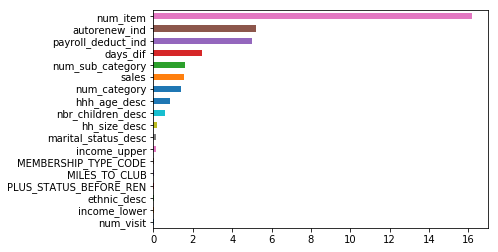

In [11]:
feature_importance = pd.Series(coefficients[0],index = all[columns].columns)

ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

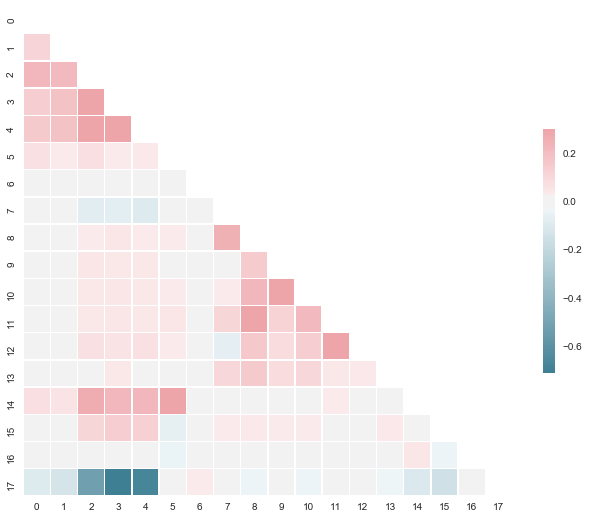

In [12]:
import seaborn as sns
import numpy as np
def plot_heatmap(df):
    corr = df.corr()
    sns.set(style = 'white')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
plot_heatmap(pd.DataFrame(X_train))

In [13]:
lr = LogisticRegression()
selector = RFECV(lr, cv=10)
selector.fit(X_train,y_train)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [14]:
optimized_columns= pd.DataFrame(columns,selector.support_)
optimized_columns

,0
True,sales
False,num_visit
True,num_item
True,num_category
True,num_sub_category
False,MEMBERSHIP_TYPE_CODE
False,MILES_TO_CLUB
True,hhh_age_desc
False,marital_status_desc
False,income_lower


In [18]:
from sklearn.metrics import accuracy_score
y_pred = selector.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  77.32592300726516


In [19]:
y_pred = selector.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])